# Gather Data

Import all necessary modules and read our covid-19 dataset

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import the comprehensive covid data
covid_data = pd.read_csv("Team_work/data/employee_2022_comp.csv", dtype={'StateFIPS' : 'int'})
#Select NC as our state and loop through every instance of NC in our covid_data and display
#Ensure that there are no duplicates in our different counties in our state
covid_data_nc = covid_data[covid_data['StateFIPS'] == 37].drop_duplicates(subset=['countyFIPS'])
covid_data_nc

,countyFIPS,County Name,State,StateFIPS,2022-01-01_confirmed,2022-01-02_confirmed,2022-01-03_confirmed,2022-01-04_confirmed,2022-01-05_confirmed,2022-01-06_confirmed,...,2022-12-23_death,2022-12-24_death,2022-12-25_death,2022-12-26_death,2022-12-27_death,2022-12-28_death,2022-12-29_death,2022-12-30_death,2022-12-31_death,population
1683,0,Statewide Unallocated,NC,37,641,641,704,277,397,896,...,0,0,0,0,0,0,0,0,0,0
4491,37001,Alamance County,NC,37,30060,30060,31258,31488,31787,32181,...,548,548,548,548,548,548,548,548,548,169509
4492,37003,Alexander County,NC,37,7257,7257,7355,7376,7436,7556,...,155,155,155,155,155,155,155,155,155,37497
4493,37005,Alleghany County,NC,37,2077,2077,2117,2122,2128,2140,...,19,19,19,19,19,19,19,19,19,11137
4494,37007,Anson County,NC,37,4249,4249,4331,4361,4440,4485,...,109,109,109,109,109,109,109,109,109,24446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,37191,Wayne County,NC,37,18581,18581,19060,19137,19336,19582,...,445,445,445,445,445,445,445,445,445,123131
4587,37193,Wilkes County,NC,37,12038,12038,12326,12388,12451,12565,...,299,299,299,299,299,299,299,299,299,68412
4588,37195,Wilson County,NC,37,14224,14224,14797,14840,14958,15171,...,349,349,349,349,349,349,349,349,349,81801
4589,37197,Yadkin County,NC,37,7299,7299,7558,7640,7691,7778,...,141,141,141,141,141,141,141,141,141,37667


Group by each state and get our sum of each column

In [44]:
covid_data_nc = covid_data_nc.groupby('State').sum()
covid_data_nc

C:\Users\warso\AppData\Local\Temp\ipykernel_7516\2446141608.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  covid_data_nc = covid_data_nc.groupby('State').sum()


,countyFIPS,StateFIPS,2022-01-01_confirmed,2022-01-02_confirmed,2022-01-03_confirmed,2022-01-04_confirmed,2022-01-05_confirmed,2022-01-06_confirmed,2022-01-07_confirmed,2022-01-08_confirmed,...,2022-12-23_death,2022-12-24_death,2022-12-25_death,2022-12-26_death,2022-12-27_death,2022-12-28_death,2022-12-29_death,2022-12-30_death,2022-12-31_death,population
State,,,,,,,,,,,,,,,,,,,,,
NC,3710000,3737,1667493,1667493,1732568,1742844,1763614,1787906,1816380,1816380,...,27629,27629,27629,27629,27629,27629,27629,27629,27629,10488084


#### Observation #1

Below you will find the results of our trend when it comes to the confirmed cases in North Carolina, there is a steady trend all the way to the end of the year. 

<AxesSubplot: >

<Figure size 640x480 with 0 Axes>

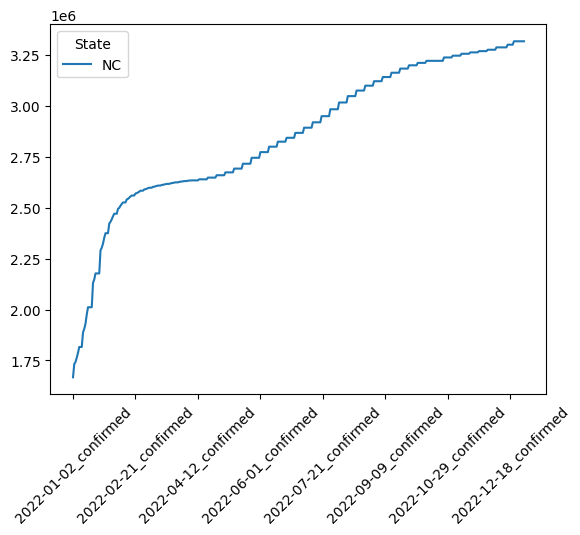

In [45]:
plt.tight_layout() #merge the plots together to get the actual data
covid_data_nc.iloc[:, 3:365].transpose().plot(rot=45) #ensure that we get our confirmed cases only


#### Observation #2

The same result as before, there was a significant increase on the dates of January 10th to January 12th, then it simply plateaus. I believe this is due to faulty reporting or not at all. I do not believe that there was no increase of deaths or confirmed cases in the last week.

<AxesSubplot: >

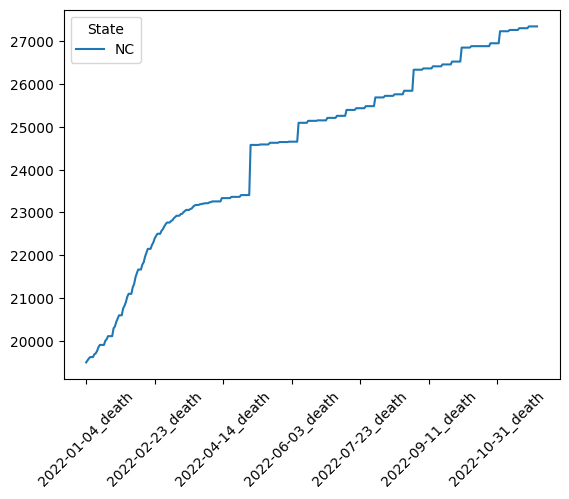

In [46]:
covid_data_nc.iloc[:, 370:700].transpose().plot(rot=45) #ensure that we get our confirmed cases only

# Encrichment Data Set 

Now we will get our enrichment data sets from the 2022 Employment dataset and display it. I also dropped all irrelevant columns in our data.

In [47]:
employee_data = pd.read_csv("Team_work/data/allhlcn222.csv", dtype={"StateFIPS" : 'int'})

#grab our columns and sift through our data
#drop the columns we do NOT want
employee_update = employee_data.drop(employee_data.loc[:, employee_data.columns.str.contains('Year|Area Type|Industry|Qtr|Status Code|NAICS|Own|Area\nCode|Cnty')], axis=1)

#Drop NaNs in our series 
employee_clean = employee_update.dropna().reset_index(drop=True)

employee_clean


 

,Area\r\nCode,StateFIPS,St Name,Area,Establishment Count,April Employment,May Employment,June Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,1000,1,Alabama,Alabama -- Statewide,"147,764","2,015,450","2,018,284","2,006,959","27,985,074,296","1,069",1.00,1.00
1,1000,1,Alabama,Alabama -- Statewide,"1,263","54,894","54,856","54,989","1,337,494,378","1,874",1.44,1.71
2,1000,1,Alabama,Alabama -- Statewide,"1,380","97,585","97,296","96,013","1,513,006,738","1,200",1.60,1.69
3,1000,1,Alabama,Alabama -- Statewide,"3,751","214,040","214,571","214,960","2,585,562,374",927,1.15,1.06
4,1000,1,Alabama,Alabama -- Statewide,"141,370","1,648,931","1,651,561","1,640,997","22,549,010,806","1,053",0.95,0.94
...,...,...,...,...,...,...,...,...,...,...,...,...
56251,56999,56,Wyoming,"Unknown Or Undefined, Wyoming",182,"1,290","1,292","1,231","22,044,900","1,334",2.10,1.42
56252,56999,56,Wyoming,"Unknown Or Undefined, Wyoming",29,227,226,212,"3,324,581","1,154",0.35,0.31
56253,56999,56,Wyoming,"Unknown Or Undefined, Wyoming",4,5,6,5,"114,953","1,658",0.01,0.03
56254,56999,56,Wyoming,"Unknown Or Undefined, Wyoming",27,0,0,0,0,0,0.00,0.00


# Merging

Showcasing a merge with our NC COVID data and NC Enrichment Data

In [54]:
employee_clean_nc = employee_clean[employee_clean['StateFIPS'] == 37]

combine = covid_data_nc.merge(employee_clean_nc)
combine

,countyFIPS,County Name,State,StateFIPS,2022-01-01_confirmed,2022-01-02_confirmed,2022-01-03_confirmed,2022-01-04_confirmed,2022-01-05_confirmed,2022-01-06_confirmed,...,St Name,Area,Establishment Count,April Employment,May Employment,June Employment,Total Quarterly Wages,Average Weekly Wage,Employment Location Quotient Relative to U.S.,Total Wage Location Quotient Relative to U.S.
0,0,Statewide Unallocated,NC,37,641,641,704,277,397,896,...,North Carolina,North Carolina -- Statewide,"344,029","4,673,518","4,708,227","4,694,965","70,758,223,731","1,160",1.00,1.00
1,0,Statewide Unallocated,NC,37,641,641,704,277,397,896,...,North Carolina,North Carolina -- Statewide,"1,610","75,719","75,726","75,601","1,634,823,589","1,662",0.85,0.83
2,0,Statewide Unallocated,NC,37,641,641,704,277,397,896,...,North Carolina,North Carolina -- Statewide,"1,538","174,576","175,692","175,321","2,594,397,334","1,139",1.25,1.15
3,0,Statewide Unallocated,NC,37,641,641,704,277,397,896,...,North Carolina,North Carolina -- Statewide,"4,794","439,950","446,671","416,797","5,755,955,472","1,019",0.95,0.93
4,0,Statewide Unallocated,NC,37,641,641,704,277,397,896,...,North Carolina,North Carolina -- Statewide,"336,087","3,983,273","4,010,138","4,027,246","60,773,047,336","1,167",1.00,1.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175129,37199,Yancey County,NC,37,3472,3472,3621,3655,3678,3684,...,North Carolina,"Unknown Or Undefined, North Carolina","2,411","33,946","34,319","34,750","800,485,543","1,793",3.04,1.88
175130,37199,Yancey County,NC,37,3472,3472,3621,3655,3678,3684,...,North Carolina,"Unknown Or Undefined, North Carolina","12,118",0,0,0,0,0,0.00,0.00
175131,37199,Yancey County,NC,37,3472,3472,3621,3655,3678,3684,...,North Carolina,"Unknown Or Undefined, North Carolina","1,768","9,159","9,264","9,651","157,839,647","1,297",0.32,0.23
175132,37199,Yancey County,NC,37,3472,3472,3621,3655,3678,3684,...,North Carolina,"Unknown Or Undefined, North Carolina",480,0,0,0,0,0,0.00,0.00


Merging both sets together in it's entirety

In [49]:
combine_data = covid_data.merge(employee_clean)
combine_data